<a href="https://colab.research.google.com/github/Neha202801/CustomerChurnPrediction/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Churn Prediction**





# . Introduction


###**What is Customer Churn? :**
* Customer churn is the rate at which customers stop using a product or service, indicating a loss of revenue and potential business challenges. Reducing churn is crucial for maintaining a healthy customer base and sustainable growth.

###**Objective :**

*   The primary objective of this project is to develop an effective customer churn prediction model that will enable business to identify and proactively retain customers at risk of leaving. By reducing customer churn, we aim to increase customer retention rates, improve customer satisfaction, and ultimately drive higher profitability for company.









## Loading Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score

In [2]:
from google.colab import files
uploaded = files.upload()

Saving archive (5).zip to archive (5) (7).zip


In [3]:
df=pd.read_csv("/content/archive (5).zip")

## Understanding the Data

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

## Data Pre-Processing

In [9]:
# Handle missing values if any
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

*   **There are no null values present in the data**

In [10]:
#Removal of unnecessary colums
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Encoding
*  Data encoding is necessary to convert categorical data into numerical format so that it can be processed by machine learning algorithms effectively. Categorical data, represented as text labels, cannot be directly used in mathematical computations. Encoding transforms these categories into numerical values, allowing algorithms to make sense of the data and identify patterns, relationships, and dependencies

In [18]:
label_encoder = LabelEncoder()

for col in df.select_dtypes(include=['object']):
    df[col] = label_encoder.fit_transform(df[col])

## Exploratory Data Analysis

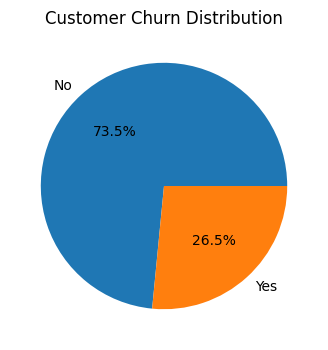

In [11]:
churn_counts = df['Churn'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%')
plt.title('Customer Churn Distribution')
plt.show()



Insight :
*   **26.6 % of customers switched to another firm.**





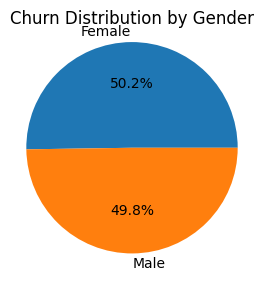

In [12]:
churn_counts_by_gender = df[df['Churn'] == "Yes"]['gender'].value_counts()
plt.figure(figsize=(3,3))
plt.pie(churn_counts_by_gender, labels=churn_counts_by_gender.index, autopct='%1.1f%%')
plt.title('Churn Distribution by Gender')
plt.axis('equal')
plt.show()


Insight
*  **The proportion of churned customers is nearly same in male (49.8%) and female (50.2%)**:

In [13]:
fig = px.histogram(df, x="Churn", color="PaymentMethod", title="Customer Payment Method distribution w.r.t. Churn")
fig.update_layout(width=600, height=500, bargap=0.1)
fig.show()

Insight :

*   **Major customers who moved out were having Electronic Check as Payment Method.**
*   **Customers who opted for Credit-Card automatic transfer or Bank Automatic Transfer and Mailed Check as Payment Method were less likely to move out.**





In [14]:
fig = px.histogram(df, x="Churn", color="OnlineSecurity", barmode="group",title="Churn w.r.t Online Security")
fig.update_layout(width=600, height=500, bargap=0.1)
fig.show()



Insight:

*   **Most customers churn in the absence of online security.**



In [15]:
fig = px.histogram(df, x="Churn", color="TechSupport",  title="Chrun distribution w.r.t. TechSupport")
fig.update_layout(width=600, height=500, bargap=0.1)
fig.show()

Insight :

*   **Customers with no TechSupport are most likely to migrate to another service**


In [19]:
df.corr()['Churn']

gender             -0.008612
SeniorCitizen       0.150889
Partner            -0.150448
Dependents         -0.164221
tenure             -0.352229
PhoneService        0.011942
MultipleLines       0.038037
InternetService    -0.047291
OnlineSecurity     -0.289309
OnlineBackup       -0.195525
DeviceProtection   -0.178134
TechSupport        -0.282492
StreamingTV        -0.036581
StreamingMovies    -0.038492
Contract           -0.396713
PaperlessBilling    0.191825
PaymentMethod       0.107062
MonthlyCharges      0.193356
TotalCharges        0.014479
Churn               1.000000
Name: Churn, dtype: float64

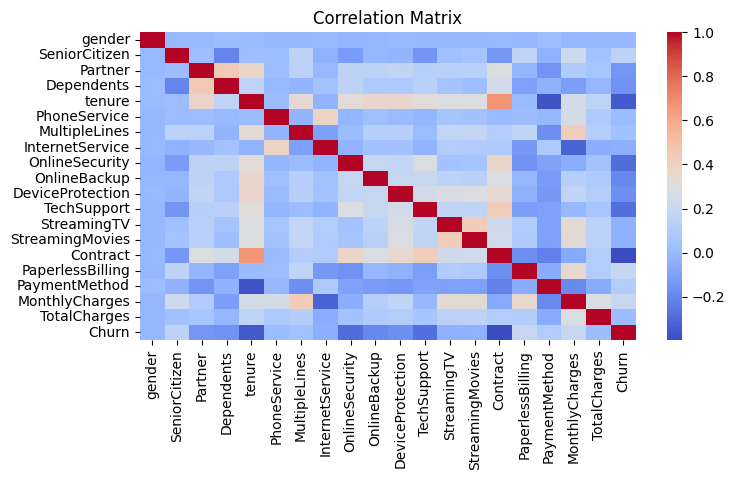

In [20]:
# Visualize a correlation matrix to understand feature relationships
correlation_matrix = df.corr()
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Insights:

*   **Tenure , Contract, Online Security are seen to be negatively corelated with target variable Churn.**
*   **Whereas monthly charges, Paperless billings are seem to be positively correlated with Churn variable.**



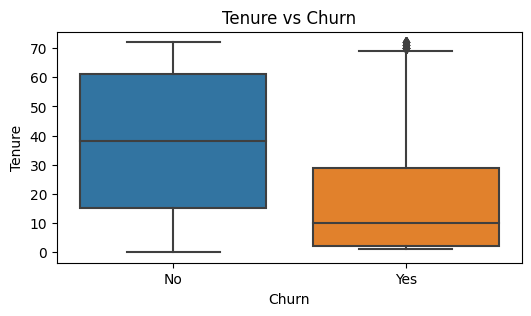

In [16]:
plt.figure(figsize=(6, 3))
sns.boxplot(data=df, x='Churn', y='tenure')
plt.title('Tenure vs Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.show()

This box plot shows the distribution of tenure (the length of time a customer
has been with the company) for churned and non-churned customers. It can help identify if tenure has an impact on churn.


 Insight :

*   **New customers are more likely to churn**







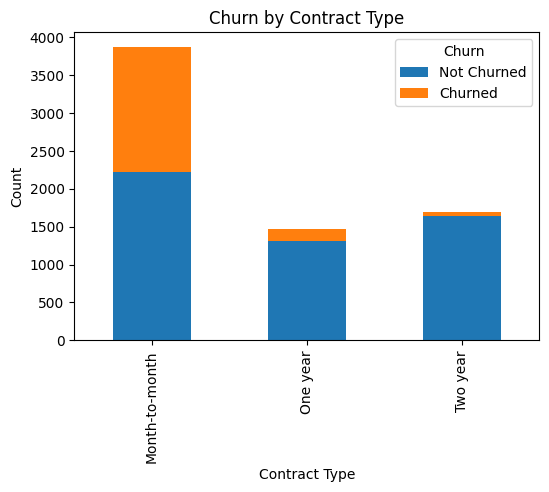

In [17]:
cross_tab = pd.crosstab(df['Contract'], df['Churn'])
cross_tab.plot(kind='bar', stacked=True, figsize=(6, 4))
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
plt.show()

Insight:
*  **most of the customers who churned had month to month contract.**

## Splitting the Data

In [21]:
# Spliting data into features X and target y
X = df.drop('Churn', axis=1)
y = df['Churn']

In [22]:
print("Features:\n",X)

Features:
       gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 1           

In [23]:
print("Target:\n",y)

Target:
 0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64


In [24]:
# Spliting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2142,0,0,0,1,21,1,0,0,2,0,2,0,0,2,1,0,3,64.85,610
1623,0,0,0,0,54,1,2,1,0,2,0,0,2,2,2,1,0,97.20,4319
6074,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,2,23.45,1940
1362,1,0,0,0,4,1,0,1,0,0,0,0,0,0,0,1,2,70.20,2012
6754,1,0,0,1,0,1,2,0,2,2,0,2,0,0,2,1,0,61.90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,1,0,1,0,1,1,0,1,2,0,0,0,2,2,0,1,2,95.00,6440
5191,0,0,1,1,23,1,2,0,2,2,2,2,2,2,2,1,1,91.10,1819
5226,1,0,1,1,12,1,0,2,1,1,1,1,1,1,0,1,2,21.15,2659
5390,1,1,0,0,12,1,2,1,0,0,2,0,2,2,0,1,2,99.45,370


In [26]:
X_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
185,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,2,24.80,2044
2715,1,0,0,0,41,1,2,2,1,1,1,1,1,1,0,1,0,25.25,6522
3825,0,0,1,1,52,1,0,2,1,1,1,1,1,1,2,0,3,19.35,67
1807,0,0,0,0,1,1,0,1,0,0,2,0,0,0,0,0,2,76.35,5822
132,1,0,0,0,67,1,0,0,0,0,0,2,0,0,2,0,0,50.55,2837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6366,0,0,1,0,64,1,0,0,0,2,2,2,0,2,2,1,3,68.30,3716
315,1,0,1,1,51,1,2,1,2,2,0,2,2,2,1,0,1,110.05,4697
2439,1,0,1,1,17,1,0,2,1,1,1,1,1,1,1,0,0,19.90,2856
5002,0,0,1,1,69,0,1,0,2,0,2,0,0,2,2,1,1,43.95,2556


In [27]:
y_train

2142    0
1623    0
6074    1
1362    1
6754    0
       ..
3772    1
5191    0
5226    0
5390    1
860     0
Name: Churn, Length: 5634, dtype: int64

In [28]:
y_test

185     1
2715    0
3825    0
1807    1
132     0
       ..
6366    0
315     0
2439    0
5002    0
1161    1
Name: Churn, Length: 1409, dtype: int64

## Feature Scaling
*   Feature scaling is important to ensure that all features contribute equally to machine learning models. It prevents variables with larger scales from dominating the learning process and helps algorithms converge faster, improving model performance and stability.

In [29]:
#Standardize feature
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
print("X_train",":",X_train)

X_train : [[-1.02516569e+00 -4.37749204e-01 -9.69578591e-01 ...  1.33926673e+00
  -4.73723375e-04 -1.40800618e+00]
 [-1.02516569e+00 -4.37749204e-01 -9.69578591e-01 ... -1.47094882e+00
   1.07475386e+00  5.58360318e-01]
 [ 9.75452077e-01 -4.37749204e-01  1.03137591e+00 ...  4.02528212e-01
  -1.37649913e+00 -7.02892284e-01]
 ...
 [ 9.75452077e-01 -4.37749204e-01  1.03137591e+00 ...  4.02528212e-01
  -1.45294499e+00 -3.21706651e-01]
 [ 9.75452077e-01  2.28441306e+00 -9.69578591e-01 ...  4.02528212e-01
   1.14953785e+00 -1.53524478e+00]
 [ 9.75452077e-01 -4.37749204e-01 -9.69578591e-01 ... -5.34210304e-01
  -1.49781538e+00  3.30921324e-01]]


In [31]:
print("X_test:\n",X_test)

X_test:
 [[-1.02516569 -0.4377492   1.03137591 ...  0.40252821 -1.33162874
  -0.64775556]
 [ 0.97545208 -0.4377492  -0.96957859 ... -1.47094882 -1.31667194
   1.72630461]
 [-1.02516569 -0.4377492   1.03137591 ...  1.33926673 -1.51277218
  -1.69588351]
 ...
 [ 0.97545208 -0.4377492   1.03137591 ... -1.47094882 -1.49449165
  -0.21726497]
 [-1.02516569 -0.4377492   1.03137591 ... -0.5342103  -0.69513389
  -0.37631322]
 [ 0.97545208 -0.4377492  -0.96957859 ...  1.33926673 -1.11392424
  -0.30156054]]


## Training the Model

### **Artificial Neural Network (ANN)**

In [32]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [33]:
model = tf.keras.Sequential([
    tf.keras.Input(19),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [34]:
#To prevent OverFitting
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=5, verbose=0,
    mode='auto', baseline=None, restore_best_weights= True
)

In [35]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [36]:
model.fit(
    X_train,
    y_train,
    validation_split=0.20,
    batch_size=100,
    epochs=10,
    verbose=0,
    callbacks = early_stopping
)

In [37]:
model.evaluate(X_test,y_test)

45/45 [==============================] - 0s 2ms/step - loss: 0.4051 - accuracy: 0.8126


[0.40509679913520813, 0.8126330971717834]

## Predicting Values

In [38]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred[:5]

45/45 [==============================] - 0s 1ms/step


array([[0.52082485],
       [0.11607464],
       [0.00756746],
       [0.6654383 ],
       [0.0124282 ]], dtype=float32)

In [39]:
y_test[:5]

185     1
2715    0
3825    0
1807    1
132     0
Name: Churn, dtype: int64

In [40]:
# To conver the Y_predictions values from floats to binary outcome
Y_pred=[]
for elements in y_pred:
  if elements >0.5:
    Y_pred.append(1)
  else:
    Y_pred.append(0)


In [41]:
Y_pred[:10]

[1, 0, 0, 1, 0, 0, 0, 0, 0, 0]

In [42]:
from sklearn.metrics import classification_report
CR=classification_report(y_test,Y_pred)
print("Classification Report:\n", CR)

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.88      1036
           1       0.68      0.56      0.61       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.81      1409



In [43]:
ConfusionMatrix=tf.math.confusion_matrix(y_test,Y_pred)
print(ConfusionMatrix)

tf.Tensor(
[[936 100]
 [164 209]], shape=(2, 2), dtype=int32)


Text(0.5, 1.0, 'Confusion Matrix')

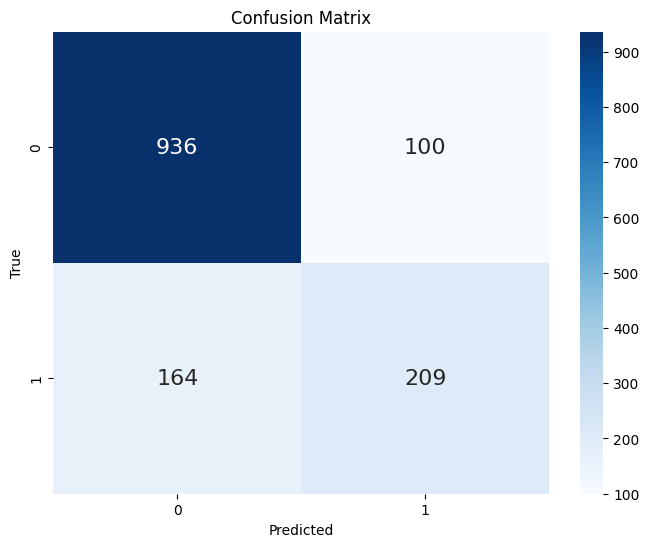

In [44]:
plt.figure(figsize=(8, 6))
sns.heatmap(ConfusionMatrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
#Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')


### **Observations:**
*   There are total 936+100=1036 Non-Churned customers and the algorithm predicts 936 of them as non churned and 100 as churned Customers.
*   There are total 164+209=373 Churned customers and the algorithm predicts 164 of them as non churned and 209 as churned Customers.
*   **Accuracy:**
1.  Accuracy = (True Positives + True Negatives) / (True Positives + True Negatives + False Positives + False Negatives)
2.  Accuracy = (936+209)/(936+209+100+164)= **0.81**


## ROC curve

In [45]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, Y_pred)
roc_auc = roc_auc_score(y_test, Y_pred)
roc_auc

0.731898309646299

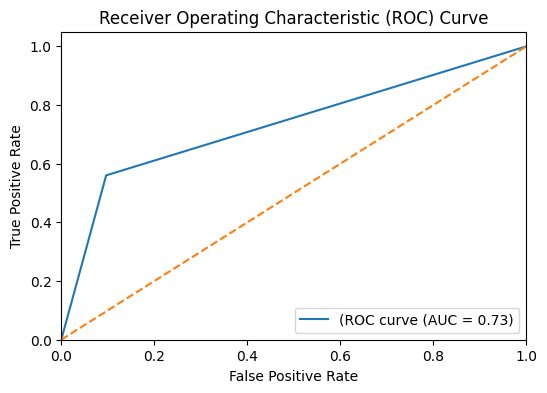

In [46]:
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr,label=f'(ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## **Summary of Findings :**
*  More than 25% customers have been switched to another company.
*  Tenure, Monthly Charges , Online Security , TechSupport are most likely to affect the Churn Rate.
*   Customers with shorter contract lenght tend to have higher churn rate.
*  **Model Performance :**

1.   Accuracy : **0.81**
2.   Precision for 0 class (i,e Precision for customers who did not churn) : **0.85**
3.    Precision for 1 class (i,e Precision for customers who churn) : **0.68**
4. f1 score for 0 class: **0.88**
5.  f1 score for 1 class : **0.61**            
   

##**Limitations :**
*  **Maintenance and Updates:**  ANNs require regular updates as customer behavior evolves and new data becomes available. Failing to update the model can result in decreased predictive accuracy.


* **Imbalanced Data:** Churn datasets often exhibit class imbalance, with fewer churn instances than non-churn instances. This imbalance can lead to biased models that prioritize accuracy but may perform poorly on churn prediction.

*  **Data Requirements:** ANNs require large amounts of data to generalize well. Small datasets can lead to overfitting, where the model performs well on the training data but poorly on new, unseen data.